In [ ]:
!pip install segment-anything opencv-python pycocotools matplotlib onnxruntime onnx ipywidgets ipyevents

In [17]:
import tifffile as tiff
import matplotlib.pyplot as plt
from ipywidgets import Image, VBox
from ipyevents import Event
import numpy as np
from io import BytesIO
from PIL import Image as PILImage
import time

In [5]:
def load_tiff_file(file_path):
    images = tiff.imread(file_path)
    return images

In [38]:
def select_and_show_image(images):
    n = len(images)
    index = int(input(f"Enter image index (1 to {n}): ")) - 1
    if 0 <= index < n:
        plt.imshow(images[index], cmap='gray')
        plt.title(f'Image index: {index + 1}')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.axis('on')
        plt.show()
        time.sleep(3)
        return index
    else:
        print("Invalid index.")
        return None

In [ ]:
def get_manual_coordinates(index):
    x = int(input("Enter x coordinate: "))
    y = int(input("Enter y coordinate: "))
    coords = {'image_index': index + 1, 'x': x, 'y': y}
    return coords

In [27]:
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels == 1]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='red', marker='.', s=marker_size, edgecolor='white', linewidth=1.25)


Enter image index (1 to 165): 10


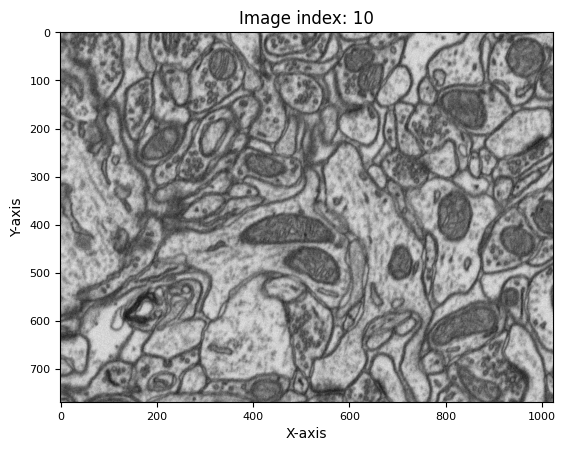

Enter x coordinate: 800
Enter y coordinate: 400


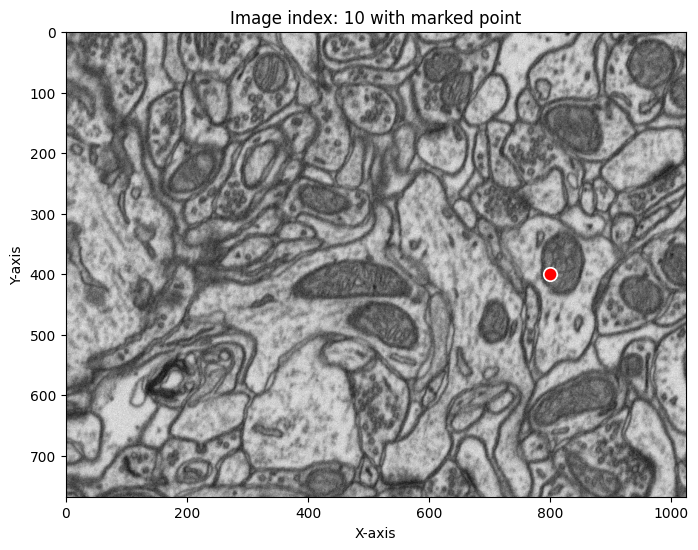

In [37]:
file_path = "/content/drive/MyDrive/Mitochondria-Data/Data/train/training.tif"
images = load_tiff_file(file_path)

index = select_and_show_image(images)
if index is not None:
    coordinates = get_manual_coordinates(index)
    input_point = np.array([[coordinates['x'], coordinates['y']]])
    input_label = np.array([1])

    plt.figure(figsize=(8, 8))
    plt.imshow(images[index], cmap='gray')
    show_points(input_point, input_label, plt.gca())
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(f"Image index: {index + 1} with marked point")
    plt.axis('on')
    plt.show()